# PART I: EDA & Data Preprocessing on Google App Store Rating Dataset

### 1. Import required libraries and read the dataset.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')
app=pd.read_csv('apps.csv')
app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [39]:
print(app.head())
print(app.shape)
print(app.info())
#by using shape, there are 10841 rows 13 columns are the in dataset.

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [40]:
print(app.describe())
#the above code will display only the description of numerical columns, we can use 'object' to display the description of object datatype columns.
print(app.describe(include='object'))

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000
           App Category Reviews                Size    Installs   Type  Price  \
count    10841    10841   10841               10841       10841  10840  10841   
unique    9660       34    6002                 462          22      3     93   
top     ROBLOX   FAMILY       0  Varies with device  1,000,000+   Free      0   
freq         9     1972     596                1695        1579  10039  10040   

       Content Rating Genres    Last Updated         Current Ver Android Ver  
count           10840  10841           10841               10833       10838  
unique              6    120            1378                2832          33  
top          Everyone  Tools  August 3, 2018  Varies with device  4.1 and up  
freq             8714    842             326                1459        2451  


### 4. Check if there are any duplicate records in the dataset? if any drop them.

In [41]:
app.duplicated().sum()

483

In [42]:
app=app.drop_duplicates()
app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [43]:
app['Category'].unique()
#to find the invalid category from Category column,we use unique() to see the category lists.

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [44]:
app=app[app['Category'].isin(['1.9'])==False]
#using isin function to filter the invalid value from a column.
app['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [45]:
app['Rating'].isnull().sum()

1465

In [46]:
app=app.dropna()

In [47]:
app['Rating_category']=app['Rating'].apply(lambda x: 'high' if x > 3.5 else 'low')
#using lambda function to name the values more than 3.5 as high and rest as low, it'll convert each value from Rating column to high/low in Rating_category column.
app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,high


### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

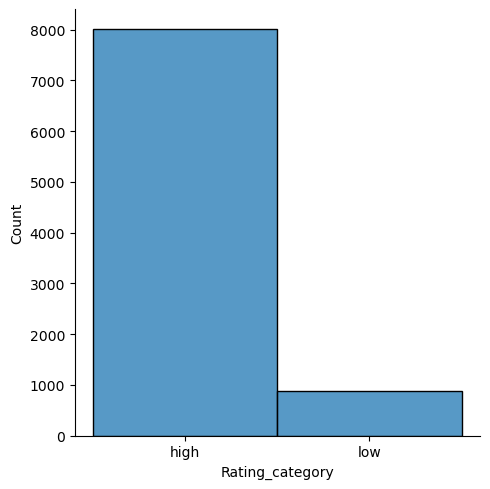

In [48]:
sn.displot(app['Rating_category'])
#to check the distribution, using seaborn.displot() for required column.
plt.show()

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [49]:
app['Reviews']=app['Reviews'].str.replace('M','*1000000').apply(eval)
#to remove M from values and multiple them as numeric value in each value, using string replace function.
app['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8886, dtype: int64

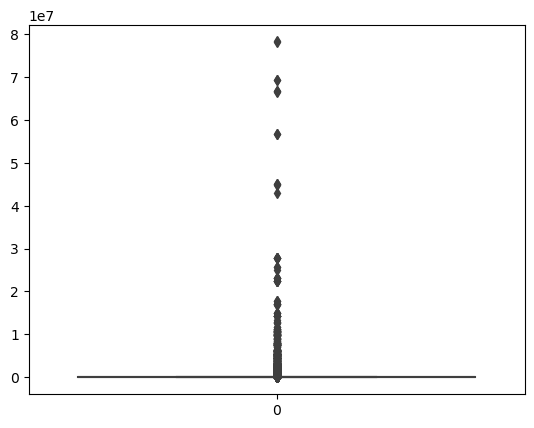

In [50]:
sn.boxplot(app['Reviews'])
#using boxplot to check the outliers
plt.show()

In [51]:
app['Reviews'] = np.log(app['Reviews'])
#as mentioned above in question, using log transformation to handle the outliers by converting them into log values.
app['Reviews']

0         5.068904
1         6.874198
2        11.379508
3        12.281384
4         6.874198
           ...    
10834     1.945910
10836     3.637586
10837     1.386294
10839     4.736198
10840    12.894978
Name: Reviews, Length: 8886, dtype: float64

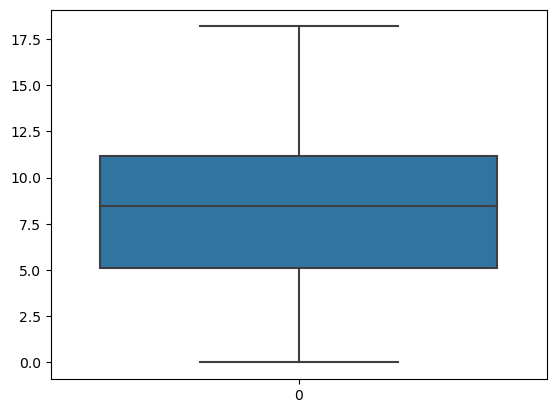

In [52]:
sn.boxplot(app['Reviews'])
#to check whether the outliers is minimized or not, using boxplot again.
plt.show()

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [53]:
app['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [54]:
app=app[app['Size'].isin(['Varies with device'])==False]
#using isin() to eleminate the invaid data from Size column
app['Size']=app['Size'].str.replace('M','*1000000').str.replace('k','*1000').apply(eval)
app['Size']

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10833      619000.0
10834     2600000.0
10836    53000000.0
10837     3600000.0
10840    19000000.0
Name: Size, Length: 7418, dtype: float64

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [55]:
app['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [56]:
app['Installs']=app['Installs'].str.replace(',','').str.replace('+','').astype(int)
app['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,  500000000,        100,        500,         10,
       1000000000,          5,         50,          1])

### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [57]:
app['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [58]:
app['Price']=app['Price'].str.replace('$','').astype(float)
app['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [59]:
app=app.drop(['Rating','App','Genres','Last Updated','Current Ver','Android Ver'],axis=1)
app

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0.0,Everyone,high
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,3.784190,619000.0,1000,Free,0.0,Everyone,high
10834,FAMILY,1.945910,2600000.0,500,Free,0.0,Everyone,high
10836,FAMILY,3.637586,53000000.0,5000,Free,0.0,Everyone,high
10837,FAMILY,1.386294,3600000.0,100,Free,0.0,Everyone,high


### 13. Encode the categorical columns.

In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
app['Rating_category']=le.fit_transform(app['Rating_category'])

app=pd.get_dummies(app,drop_first=True)
app

,Reviews,Size,Installs,Price,Rating_category,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.068904,19000000.0,10000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6.874198,14000000.0,500000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,11.379508,8700000.0,5000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,12.281384,25000000.0,50000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6.874198,2800000.0,100000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,3.784190,619000.0,1000,0.0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
10834,1.945910,2600000.0,500,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,3.637586,53000000.0,5000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,1.386294,3600000.0,100,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [61]:
x=app.drop(['Rating_category'],axis=1)
y=app[['Rating_category']]

### 15. Split the dataset into train and test.

In [62]:
from sklearn.model_selection import train_test_split as tts
#to split the dataset, splitting test as 30% and training as 70%
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=1)

### 16. Standardize the data, so that the values are within a particular range.

In [63]:
from sklearn.preprocessing import MinMaxScaler
#importing minmax scaler to standardize the data at particular range i.e. 0 to 1.
mms=MinMaxScaler()
x_train.iloc[:,0:3]=mms.fit_transform(x_train.iloc[:,0:3])
x_train

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
4407,0.584133,0.689974,9.999990e-04,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5679,0.573146,0.249936,4.999990e-04,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6119,0.062351,0.099923,4.900000e-08,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1564,0.363148,0.050919,9.999900e-05,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8295,0.618472,0.057920,4.999999e-03,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,0.666911,0.006156,9.999999e-03,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7763,0.502992,0.169929,9.999990e-04,0.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5983,0.170021,0.149928,9.990000e-07,0.0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
349,0.585471,0.149928,4.999999e-03,0.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


# PART II: Data Visualization on Honey Production dataset using seaborn and matplotlib libraries.

### 1. Import required libraries and read the dataset.

In [64]:
hp=pd.read_csv('honeyproduction.csv')
hp

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [65]:
print(hp.shape)
print(hp.info())
hp.head(10)

(626, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB
None


,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998


### 3. Display the percentage distribution of the data in each year using the pie chart.

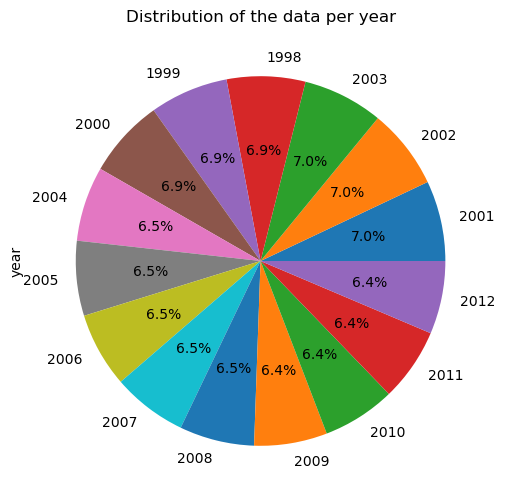

In [66]:
plt.figure(figsize=(8,6))
hp['year'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title('Distribution of the data per year')
plt.show()

### 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

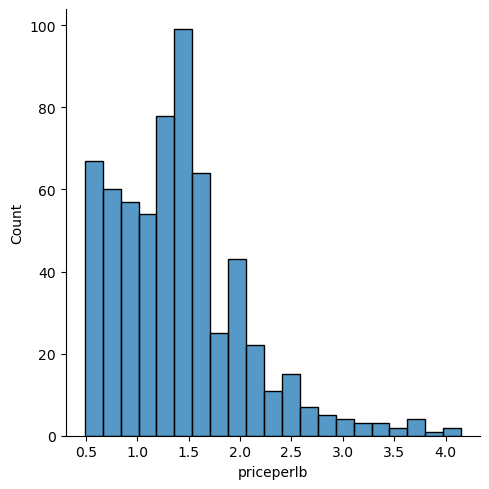

In [67]:
sn.displot(hp['priceperlb'])
plt.show()

* The distribution of 'price per lb' column is positively skewed as the value of mean is higher than mean value.

### 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.

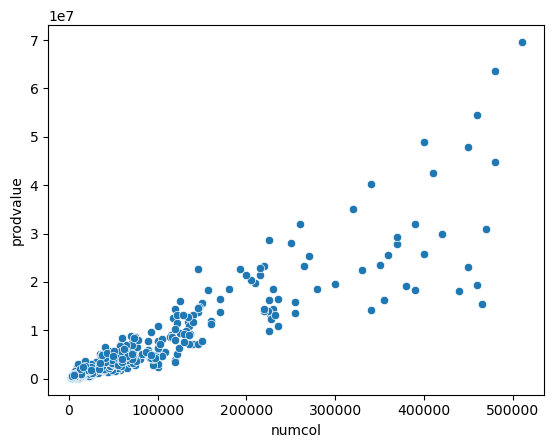

In [68]:
sn.scatterplot(data=hp,x=hp['numcol'],y=hp['prodvalue'])
plt.show()

* On seeing the scatter plot, the values of 'num col' and 'prod value' are correlated.

### 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.

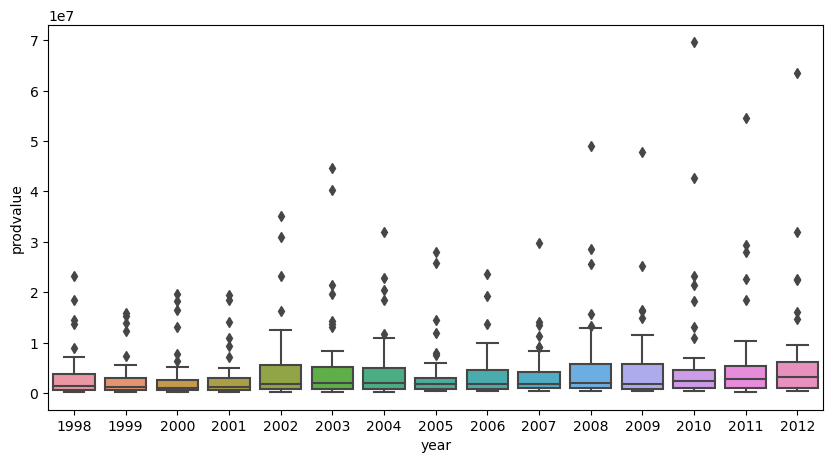

In [69]:
plt.figure(figsize=(10,5))
sn.boxplot(data=hp,x=hp['year'],y=hp['prodvalue'])
plt.show()

* The values of 'prod value' from year 2010 are highly distributed, hence it has the larger outliers. Similarly year 1999 values has less distribution.

### 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

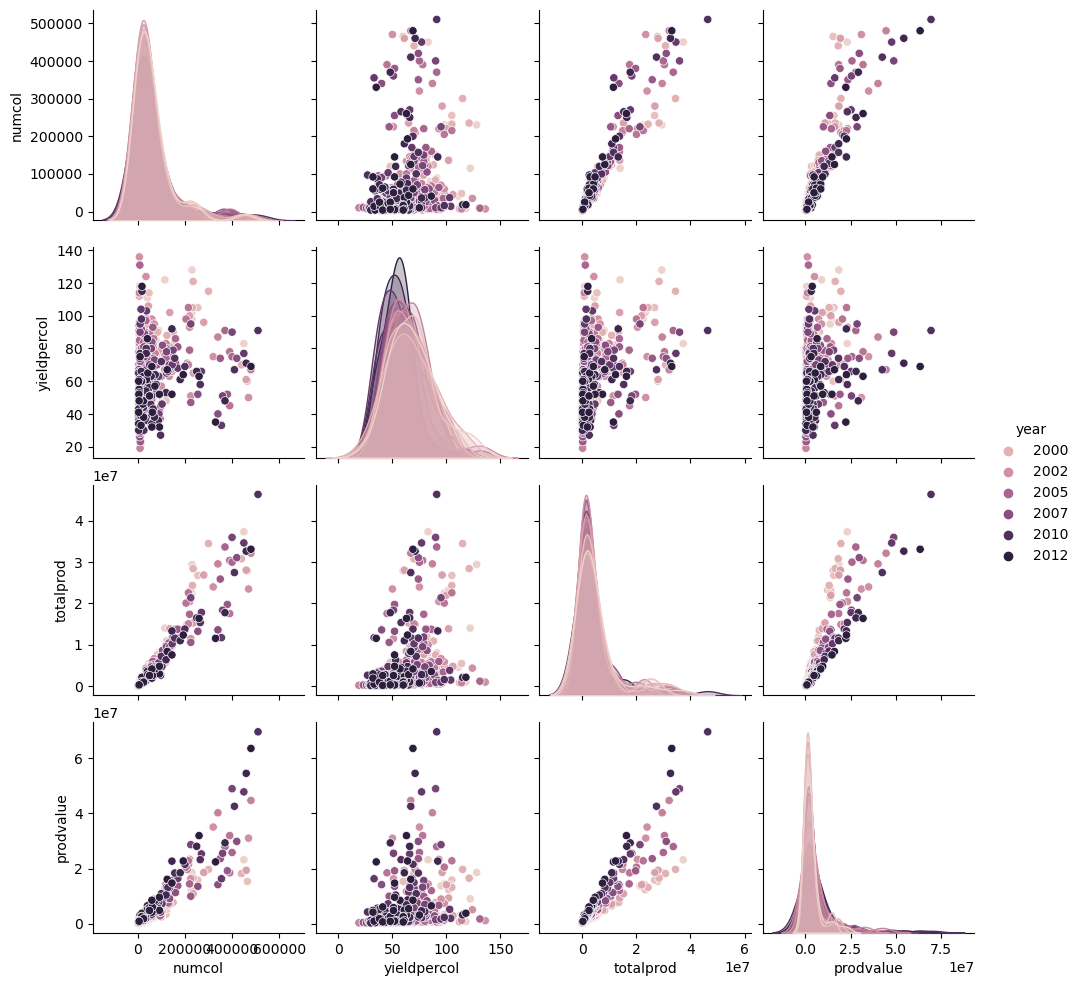

In [70]:
sn.pairplot(hp[['numcol','yieldpercol','totalprod','prodvalue','year']],hue='year')
plt.show()

### 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')

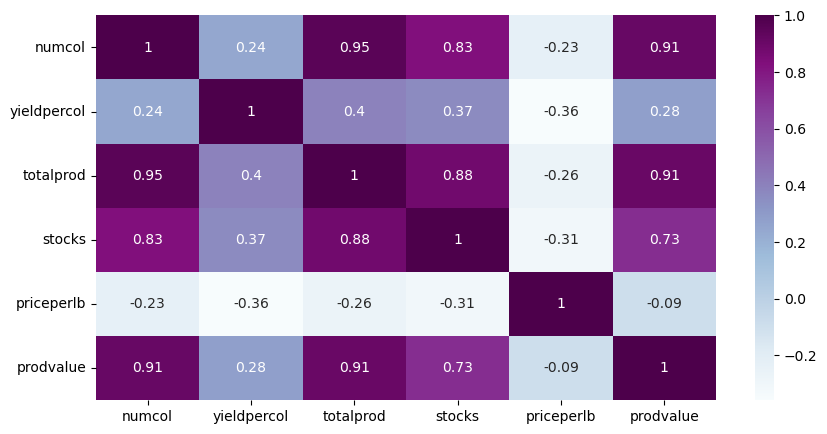

In [71]:
plt.figure(figsize=(10,5))
sn.heatmap(hp[['numcol','yieldpercol','totalprod','stocks','priceperlb','prodvalue']].corr(),annot=True,cmap='BuPu')
plt.show()

* The values of 'total prod' and 'num col' are highly correlated with 0.95 & 'price per lb' and 'yield per col' having the less correlation with -0.36.